# LWA1 Commander Output Data

In [1]:
import glob
from cmath import nan
import numpy as np
import healpy as hp
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
import h5py as h5
from pathlib import Path
from datetime import datetime

visualization_path = Path("../visualization/")
figs_path = Path(visualization_path/"figs/")
commander_out_images_path = Path(visualization_path/"map-images/commander_out/")
data_path = Path("../data/")
LWA1_source_path = Path(data_path/"LWA1_source/")
commander_in_path = Path(data_path/"commander_in/")

figs_path.mkdir(parents=True, exist_ok=True)
commander_out_images_path.mkdir(parents=True, exist_ok=True)
LWA1_source_path.mkdir(parents=True, exist_ok=True)
commander_in_path.mkdir(parents=True, exist_ok=True)

op = "optimize"
op = "sample"
sampling="11"

beta = "chisq"
isBeta = True

md_version = "02"
comp = "020406"
band = "005017"
nchain = 1
totaliter = 100

now = datetime.now()
date = now.strftime("%y%m%d")
filename = 'temp_{date}'.format(date=date)
file_list = glob.glob('*.*')

## Maps produced by Commander run

In [6]:
#
# Display the maps to check if they're okay
#
def plot_maps(maps, cbrange_K=None):
    """Plot the maps in a 3x3 grid.

    Args:
        maps (dict): Dictionary of maps to plot.
        cbrange_K (dict): Dictionary of colorbar ranges for each map. Defaults to None.

    Returns:
        None: Displays the maps in a 3x3 grid.

    Notes:
        The maps are plotted in a 3x3 grid, with the colorbar range for each map
        set to the values in the cbrange_K dictionary.

    """
    fig, axs = plt.subplots(3, 3, figsize=(7.3, 4.8), dpi=300)
    mpl.rcParams['figure.titlesize'] = 10
    mpl.rcParams['axes.titlesize'] = 6
    mpl.rcParams['font.size'] = 4
    # mpl.rcParams['legend.title_fontsize'] = 8
    # mpl.rcParams['legend.fontsize'] = 8
    # mpl.rcParams['xtick.labelsize'] = 8
    # mpl.rcParams['ytick.labelsize'] = 8
    # mpl.rcParams['axes.labelsize'] = 8

    # plt.tight_layout()
    count = 0
    for ax,freq,map in zip(axs.flat, maps.keys(), maps.values()):
        # print(ax)
        plt.axes(ax)
        mrgn = 1.0
        margins = (mrgn,mrgn,mrgn,mrgn)

        if cbrange_K is None:
            hp.mollview(map, title=f"{freq} MHz", xsize=2000, cmap='jet', unit='K', hold=True)
        else:
            hp.mollview(map, title=f"{freq} MHz", min=cbrange_K[freq][0], max=cbrange_K[freq][1], xsize=2000, cmap='jet', unit='K', hold=True)
        # hp.mollview(map, title=f"{freq} MHz", min=0.0, max=8000.0, xsize=2000, cmap='jet', unit='K', margins=margins, hold=True)
        hp.graticule(lw=0.5)

        # hp.mollview(celest_lwa180/1000, min=0.9, max=4.5, coord=['C', 'G'], cmap='gist_heat', unit='kK')
        # hp.mollview(map_lwa180/1000, min=0.9, max=4.5, coord=['C', 'G'], cmap='gist_heat')
        # hp.mollview(map_lwa180, coord=['C', 'G'])
        # hp.mollview(map_lwa180,  coord=['C', 'G'], norm="hist")

        ### Change font size of colorbar units text in hp.mollview ###
        f = plt.gcf().get_children() # accessing the current figure...
        # print(f)
        # print(len(f))
        # print(f[-1]) # ... then the colorbar's elements
        CbAx = f[-1].get_children() # ... then the colorbar's elements
        # print(CbAx)
        # print(len(CbAx))
        coord_text_obj = CbAx[2] # [1] corresponds to the particular label of the
                                            # colorbar, i.e. "Field value" in this case
        coord_text_obj.set_fontsize(6)
        coord_text_obj.set_y(-4.0)
        # plt.show()
        
        #
        # Save just the single frequency map (subplot)
        #
        # Pad the saved area by 10% in the x-direction and 10% in the y-direction
        extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())

        # LWA1_map_image_dir = Path(LWA1_map_images_path/f'LWA1-00{freq}/')
        # LWA1_map_image_dir.mkdir(parents=True, exist_ok=True)
        # LWA1_map_image_file = f"LWA1-00{freq}_map.png"
        # fig.savefig(LWA1_map_image_dir/LWA1_map_image_file, bbox_inches=extent.expanded(1.01, 1.20), dpi=300)
        # fig.savefig(LWA1_map_images_path/f'LWA1-00{freq}/LWA1-00{freq}_map.png', bbox_inches=extent)

        count = count + 1

    fig.suptitle("LWA1 Survey Maps", y=0.95)
    plt.tight_layout()
    # fig.subplots_adjust(top=0.95)
    # fig.tight_layout()

    # 
    # Save the whole figure as a png image
    # 
    # LWA1_allmaps_image_file = f"LWA1_allmaps.png"
    # plt.savefig(LWA1_map_images_path/LWA1_allmaps_image_file, dpi=300, bbox_inches='tight')

# plot_maps(maps_lwa1, cbrange_K)


In [4]:
if isBeta:
    run_str = op+sampling+f"_beta{beta}_mdv{md_version}_bd{band}_cp{comp}_c{nchain}_k{totaliter}"
else:
    run_str = op+sampling+f"_mdv{md_version}_bd{band}_cp{comp}_c{nchain}_k{totaliter}"
dir_comm = f"/mn/stornext/d16/cmbco/AST9240/2022/jibran/commander_chains/"+run_str+"/"

k = totaliter
lwa1_freq = "80"


print(dir_comm)
# file_list = glob.glob(dir_comm+f"*100.fits")
# print(file_list)
# file_comm_synch_lwa180 = file_list[3]
# file_comm_res_lwa180 = file_list[2]
# file_comm_synch = file_list[5]
# file_comm_ff = file_list[-1]
# file_comm_chisq = file_list[1]


file_comm_synch_lwa180 = glob.glob(dir_comm+"synch*"+lwa1_freq+f"*LWA1*{k}.fits")[0]
print(file_comm_synch_lwa180)
file_comm_res_lwa180 = glob.glob(dir_comm+f"res*"+lwa1_freq+f"*LWA1*{k}.fits")[0]
print(file_comm_res_lwa180)
file_comm_synch = glob.glob(dir_comm+f"synch_c*{k}.fits")[0]
print(file_comm_synch)
file_comm_ff = glob.glob(dir_comm+f"ff*"+lwa1_freq+f"*LWA1*{k}.fits")[0]
print(file_comm_ff)
file_comm_chisq = glob.glob(dir_comm+f"chisq*{k}.fits")[0]
print(file_comm_chisq)
file_comm_synch_beta = glob.glob(dir_comm+f"synch_beta*{k}.fits")[0]
print(file_comm_synch_beta)
# Create a method that uses glob to load all the files being processed above
# but while the code above is doing so for a single iteration (k), this method
# 

#
# Import lwa1-80 healpix map in galactic/celestial coords
#
freq = 80
LWA1_path = Path(commander_in_path/f"LWA1-00{freq}")
LWA1_map_file = f"LWA1-00{freq}_map.fits"
lwa1_map = hp.fitsfunc.read_map(LWA1_path/LWA1_map_file, dtype=None)

synch_80MHz_LWA1_comm = hp.fitsfunc.read_map(file_comm_synch_lwa180)
res_80MHz_LWA1_comm = hp.fitsfunc.read_map(file_comm_res_lwa180)
synch_comm = hp.fitsfunc.read_map(file_comm_synch)
ff_80MHz_LWA1_comm = hp.fitsfunc.read_map(file_comm_ff)
chisq_comm = hp.fitsfunc.read_map(file_comm_chisq)
synch_beta_comm = hp.fitsfunc.read_map(file_comm_synch_beta)

# Create dict

comm_maps_dir_name = f"comm_{date}-"+run_str
comm_maps_dir_path = Path(commander_out_images_path/comm_maps_dir_name)
comm_maps_dir_path.mkdir(parents=True, exist_ok=True)
comm_maps_file_prefix = date + "-" + run_str



#
# Plot the maps
#



/mn/stornext/d16/cmbco/AST9240/2022/jibran/commander_chains/sample11_betachisq_mdv02_bd005017_cp020406_c1_k100/
/mn/stornext/d16/cmbco/AST9240/2022/jibran/commander_chains/sample11_betachisq_mdv02_bd005017_cp020406_c1_k100/synch_0.080-LWA1_c0001_k000100.fits
/mn/stornext/d16/cmbco/AST9240/2022/jibran/commander_chains/sample11_betachisq_mdv02_bd005017_cp020406_c1_k100/res_0.080-LWA1_c0001_k000100.fits
/mn/stornext/d16/cmbco/AST9240/2022/jibran/commander_chains/sample11_betachisq_mdv02_bd005017_cp020406_c1_k100/synch_c0001_k000100.fits
/mn/stornext/d16/cmbco/AST9240/2022/jibran/commander_chains/sample11_betachisq_mdv02_bd005017_cp020406_c1_k100/ff_0.080-LWA1_c0001_k000100.fits
/mn/stornext/d16/cmbco/AST9240/2022/jibran/commander_chains/sample11_betachisq_mdv02_bd005017_cp020406_c1_k100/chisq_c0001_k000100.fits
/mn/stornext/d16/cmbco/AST9240/2022/jibran/commander_chains/sample11_betachisq_mdv02_bd005017_cp020406_c1_k100/synch_beta_c0001_k000100.fits


In [ ]:
# file_comm_synch_lwa180 = dir_comm+f"synch_80MHz-LWA1*{k}.fits"
# file_comm_res_lwa180 = dir_comm+f"res_80MHz-LWA1*{k}.fits"
# file_comm_synch = dir_comm+f"synch_c*{k}.fits"
# file_comm_ff = dir_comm+f"ff_80MHz-LWA1*{k}.fits"

# file_comm_synch_lwa180 = "commander_outputs/221027-commout/synch_80MHz-LWA1_c0001_k000010.fits" # what is the difference between this and just synch
# file_comm_res_lwa180 = "commander_outputs/221027-commout/res_80MHz-LWA1_c0001_k000010.fits" # residual map... but residual between what and what?
# file_comm_synch = "commander_outputs/221027-commout/synch_c0001_k000010.fits"
# file_comm_ff = "commander_outputs/221027-commout/ff_80MHz-LWA1_c0001_k000010.fits" # free-free emission map


# file_comm_synch_lwa180_old = "commander_outputs/commander5/synch_80MHz-LWA1_c0001_k000005.fits" # what is the difference between this and just synch
# file_comm_res_lwa180_old = "commander_outputs/commander5/res_80MHz-LWA1_c0001_k000005.fits" # residual map... but residual between what and what?
# file_comm_synch_old = "commander_outputs/commander5/synch_c0001_k000005.fits"
# file_comm_ff_old = "commander_outputs/commander5/ff_80MHz-LWA1_c0001_k000005.fits" # free-free emission map

/astro/local/anaconda/envs/py38/lib/python3.8/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 256
  warnings.warn("NSIDE = {0:d}".format(nside))
/astro/local/anaconda/envs/py38/lib/python3.8/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/astro/local/anaconda/envs/py38/lib/python3.8/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))
/astro/local/anaconda/envs/py38/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/astro/local/anaconda/envs/py38/lib/python3.8/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default

-3.1103982463322786


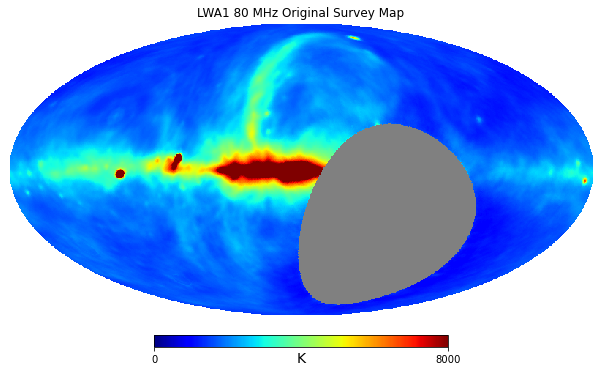

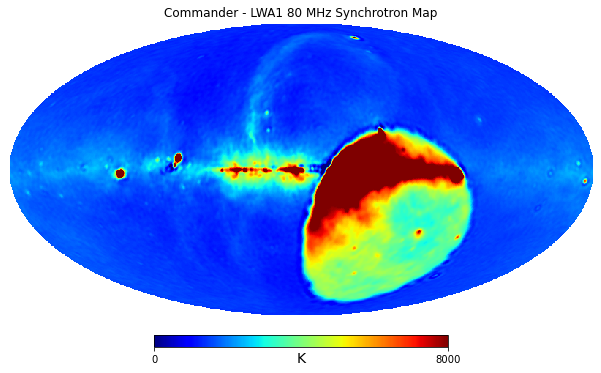

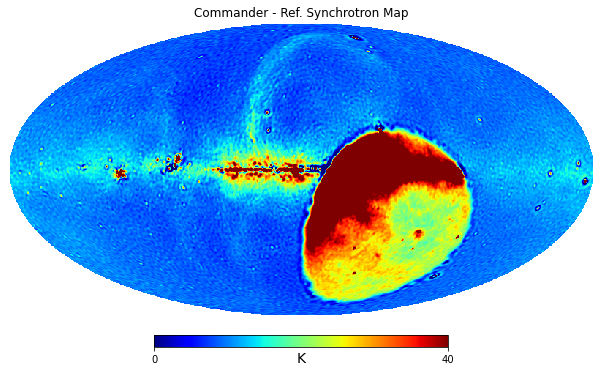

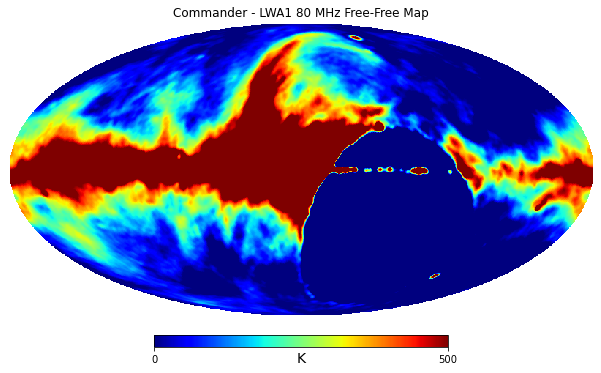

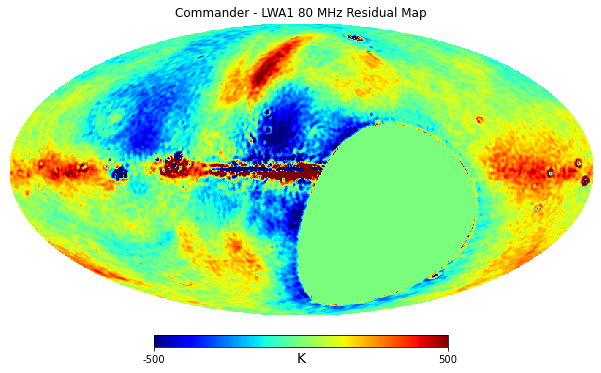

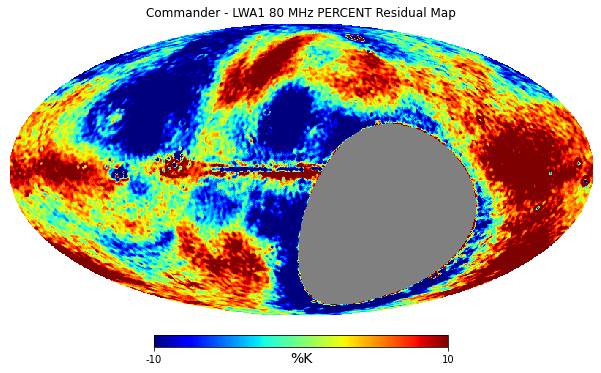

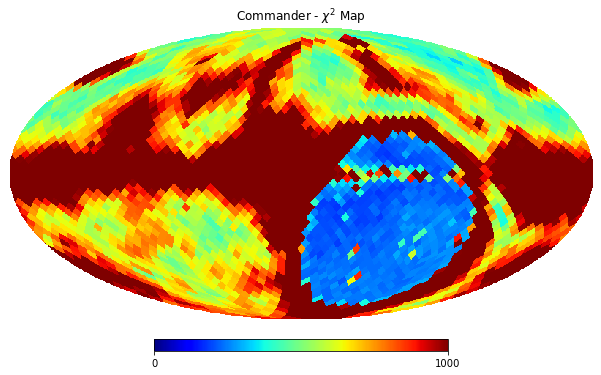

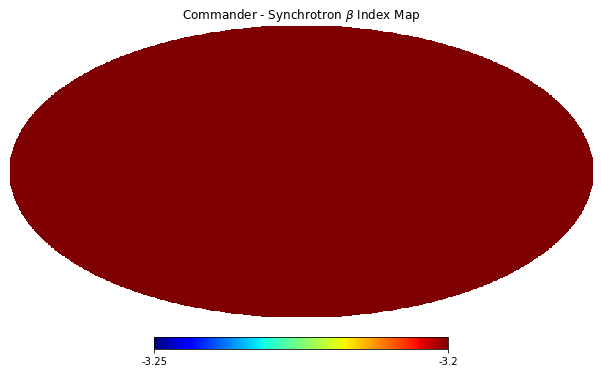

In [5]:

hp.mollview(lwa1_map, title="LWA1 80 MHz Original Survey Map", min=0.0, max=8000.0, cmap='jet', unit='K')



hp.mollview(synch_80MHz_LWA1_comm, title="Commander - LWA1 80 MHz Synchrotron Map", min=0.0, max=8000.0, cmap='jet', unit='K')
# hp.mollview(res_80MHz_LWA1_comm/1000, title="Commander - LWA1 80 MHz Residual Map", cmap='jet', unit='kK')
plt.savefig(comm_maps_dir_path/Path(comm_maps_file_prefix+'-synch_0080-LWA1-comm.png'))

hp.mollview(synch_comm/(10**6), title="Commander - Ref. Synchrotron Map", min=0.0, max=40.0, cmap='jet', unit='K')
plt.savefig(comm_maps_dir_path/Path(comm_maps_file_prefix+'-synch-comm.png'))

hp.mollview(ff_80MHz_LWA1_comm, title="Commander - LWA1 80 MHz Free-Free Map", min=0.0, max=500.0, cmap='jet', unit='K')
plt.savefig(comm_maps_dir_path/Path(comm_maps_file_prefix+'-ff_0080-LWA1-comm.png'))

hp.mollview(res_80MHz_LWA1_comm, title="Commander - LWA1 80 MHz Residual Map", cmap='jet', min=-500, max=500, unit='K')
plt.savefig(comm_maps_dir_path/Path(comm_maps_file_prefix+'-res_0080-LWA1-comm.png'))
# Create PERCENT-RESIDUAL map from the Comm resid map
percentres_lwa180 = res_80MHz_LWA1_comm/lwa1_map * 100
hp.mollview(percentres_lwa180, title="Commander - LWA1 80 MHz PERCENT Residual Map", min=-10, max=10, cmap='jet', unit='%K')
plt.savefig(comm_maps_dir_path/Path(comm_maps_file_prefix+'-resprcnt_0080-LWA1-comm.png'))

hp.mollview(chisq_comm, title=r"Commander - $\chi^2$ Map", cmap='jet', min=0.0, max=1000)
plt.savefig(comm_maps_dir_path/Path(comm_maps_file_prefix+'-chisq-comm.png'))

hp.mollview(synch_beta_comm, title=r"Commander - Synchrotron $\beta$ Index Map", min=-3.25, max=-3.2, cmap='jet')
plt.savefig(comm_maps_dir_path/Path(comm_maps_file_prefix+'-synch_beta-comm.png'))

print(synch_beta_comm[0])


# hp.mollview(synch_80MHz_LWA1_comm_old, title="OLD Commander - LWA1 80 MHz Synchrotron Map", min=0.0, max=15000.0, cmap='jet', unit='K')
# hp.mollview(res_80MHz_LWA1_comm_old, title="OLD Commander - LWA1 80 MHz Residual Map", cmap='jet', min=-5000, max=5000, unit='K')
# hp.mollview(synch_comm_old/(10**6), title="OLD Commander - Ref. Synchrotron Map", min=0.0, max=100.0, cmap='jet', unit='K')
# hp.mollview(ff_80MHz_LWA1_comm_old, title="OLD Commander - LWA1 80 MHz Free-Free Map", min=0.0, max=5000.0, cmap='jet', unit='K')

# hp.mollview(map_lwa180/1000, min=0.9, max=4.5, coord=['C', 'G'], cmap='gist_heat')
# hp.mollview(map_lwa180, coord=['C', 'G'])
# hp.mollview(map_lwa180,  coord=['C', 'G'], norm="hist")

[-3.0410454 -3.0410454 -3.0410454 ... -3.0410454 -3.0410454 -3.0410454]


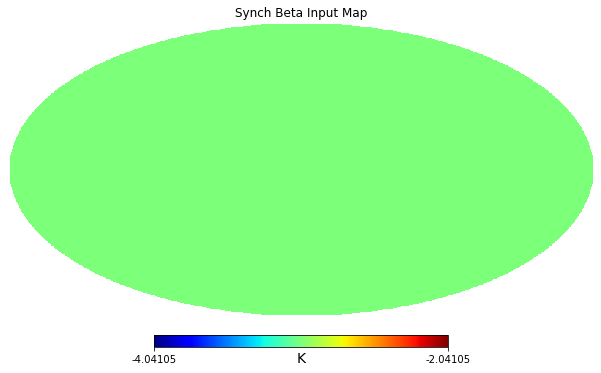

In [7]:
# Import commander default input synch beta map
synch_beta_input_file = "/mn/stornext/d16/cmbco/AST9240/2022/data/init_synch_beta_BP8.1_v1.fits"
synch_beta_input_map = hp.fitsfunc.read_map(synch_beta_input_file, dtype=None)
print(synch_beta_input_map)

#
# Display the map to check if it's okay
#
hp.mollview(synch_beta_input_map, title="Synch Beta Input Map", cmap='jet', unit='K')

## Plotting cool shit

In [8]:
fgindmean = np.genfromtxt(dir_comm+'fg_ind_mean_c0001.dat',
                            dtype=None,
                            usecols=np.arange(0,6),
                            names=True)
fgindmean = np.genfromtxt(dir_comm+'fg_ind_mean_c0001.dat',
                            dtype=None,
                            usecols=np.arange(0,6),
                            names=True)
# print(fgindmean)

"""
#################
"""
# /mn/stornext/d16/cmbco/AST9240/2022/jibran/commander-chains/sample11_betachisq_bd005017_cp020406_c1_k5/chain_c0001.h5
print(dir_comm)
f = h5.File(dir_comm+'chain_c0001.h5', 'r')
type(f)

# names = []
mp_per_iter_lwa1 = []
def find_mp_lwa1(name, object):
    if 'md/0.080-LWA1' in name:
        # names.append(name)
        # print(object[()][0])
        mp_per_iter_lwa1.append(object[()][0])
    return None
f.visititems(find_mp_lwa1)

mp_per_iter_haslam = []
def find_mp_haslam(name, object):
    if 'md/0.4-Haslam' in name:
        # names.append(name)
        # print(object[()][0])
        mp_per_iter_haslam.append(object[()][0])
    return None
f.visititems(find_mp_haslam)


"""
#################
"""
start_step = 0

itercomm = fgindmean['Sample'][start_step:]
synchbeta_per_iter = fgindmean['synch_beta_I'][start_step:]
fullchisq_per_iter = fgindmean['full_chisq'][start_step:]
mp_per_iter_lwa1 = np.array(mp_per_iter_lwa1)[start_step:]
mp_per_iter_haslam = np.array(mp_per_iter_haslam)[start_step:]

print(mp_per_iter_lwa1.shape)
print(mp_per_iter_lwa1[0:2])
print(mp_per_iter_haslam.shape)
print(mp_per_iter_haslam[0:2])

/mn/stornext/d16/cmbco/AST9240/2022/jibran/commander_chains/sample11_betachisq_mdv02_bd005017_cp020406_c1_k100/
(101,)
[2210.         1568.17863721]
(101,)
[9940000.         7954932.71092035]


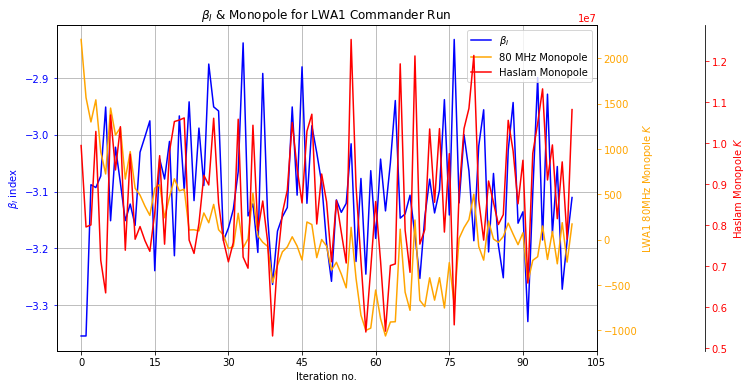

In [9]:
figs_dir_name = f"{date}-"+run_str
figs_dir_path = Path(figs_path/figs_dir_name)
figs_dir_path.mkdir(parents=True, exist_ok=True)
figs_file_postfix = date + "-" + run_str + ".png"


fig, ax = plt.subplots(figsize=(12, 6))
fig.subplots_adjust(right=0.75)

ax1 = ax.twinx()
ax2 = ax.twinx()

# Offset the right spine of ax2.  The ticks and label have already been
# placed on the right by twinx above.
ax2.spines.right.set_position(("axes", 1.2))

# ax.set_title(r'LWA1 80 MHz Synchrotron $\beta_I$ & Monopole')

ln = ax.plot(itercomm, synchbeta_per_iter, label=r'$\beta_I$', color='blue')
ln1 = ax1.plot(itercomm, mp_per_iter_lwa1, label=r'80 MHz Monopole', color='orange')
ln2 = ax2.plot(itercomm, mp_per_iter_haslam, label=r'Haslam Monopole', color='red')

ax.set(title=r'$\beta_I$ & Monopole for LWA1 Commander Run', xlabel='Iteration no.', ylabel=r'$\beta_I$ index')
ax1.set(ylabel=r'LWA1 80MHz Monopole $K$')
ax2.set(ylabel=r'Haslam Monopole $K$')

# ax1.set_yscale('symlog')
# ax1.set_ylim(1e1, 2e7)

ln_color = ln[0].get_color()
ln1_color = ln1[0].get_color()
ln2_color = ln2[0].get_color()
ax.yaxis.label.set_color(ln_color)
ax1.yaxis.label.set_color(ln1_color)
ax2.yaxis.label.set_color(ln2_color)

ax.tick_params(axis='y', colors=ln_color)
ax1.tick_params(axis='y', colors=ln1_color)
ax2.tick_params(axis='y', colors=ln2_color)

# Solution for having two legends
leg = ln + ln1 + ln2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs)

# #...
# ax = plt.figure().gca()
# #...
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
# ax.xaxis.set_major_locator(ticker.IndexLocator(base=10, offset=0))

ax.grid()

beta_mp_file_name = 'beta_mp_iters-' + figs_file_postfix
plt.savefig(figs_dir_path/beta_mp_file_name, dpi=300, bbox_inches='tight')

plt.show()

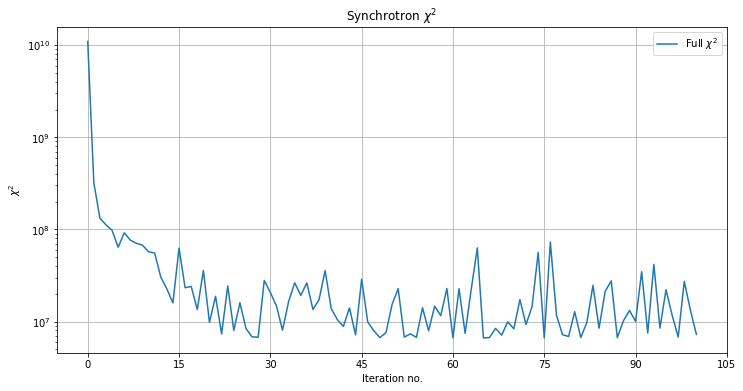

In [10]:

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title(r'Synchrotron $\chi^2$')
ax.semilogy(itercomm, fullchisq_per_iter, label=r'Full $\chi^2$')
# ax.plot(fgindmean['Sample'], fgindmean['avg_chisq'], label=r'Avg $\chi^2$')
ax.set_xlabel('Iteration no.')
ax.set_ylabel(r'$\chi^2$')
ax.grid()
ax.legend()

# #...
# ax = plt.figure().gca()
# #...
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
# ax.xaxis.set_major_locator(ticker.IndexLocator(base=10, offset=0))

fullchisq_file_name = 'full_chisq_iters-' + figs_file_postfix
plt.savefig(figs_dir_path/fullchisq_file_name, dpi=300, bbox_inches='tight')
plt.show()